In [1]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from collections import Counter
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import os
from mpl_toolkits.basemap import Basemap
from collections import defaultdict
import time
import missingno

In [2]:
station_d=pd.read_csv("https://raw.githubusercontent.com/dewaranch/Covid/master/data/processed/demographic_features.tsv",sep="\t")

In [3]:
#dropping columns per Daniel's suggestion
col_to_drop=['lat','lon','CensusPopulation2010','3-YrDiabetes2015-17','3-YrMortalityAge<1Year2015-17','3-YrMortalityAge1-4Years2015-17',
             '3-YrMortalityAge5-14Years2015-17','3-YrMortalityAge15-24Years2015-17','3-YrMortalityAge25-34Years2015-17',
             '3-YrMortalityAge35-44Years2015-17','3-YrMortalityAge45-54Years2015-17','3-YrMortalityAge55-64Years2015-17',
             '3-YrMortalityAge65-74Years2015-17','3-YrMortalityAge75-84Years2015-17','3-YrMortalityAge85+Years2015-17',
             'mortality2015-17Estimated','HPSAShortage','HPSAServedPop','HPSAUnderservedPop']
station_d=station_d.drop(col_to_drop,axis=1).reset_index()
station_d["dem_prop"]=station_d[["dem_to_rep_ratio"]]/(station_d[["dem_to_rep_ratio"]]+1)*100

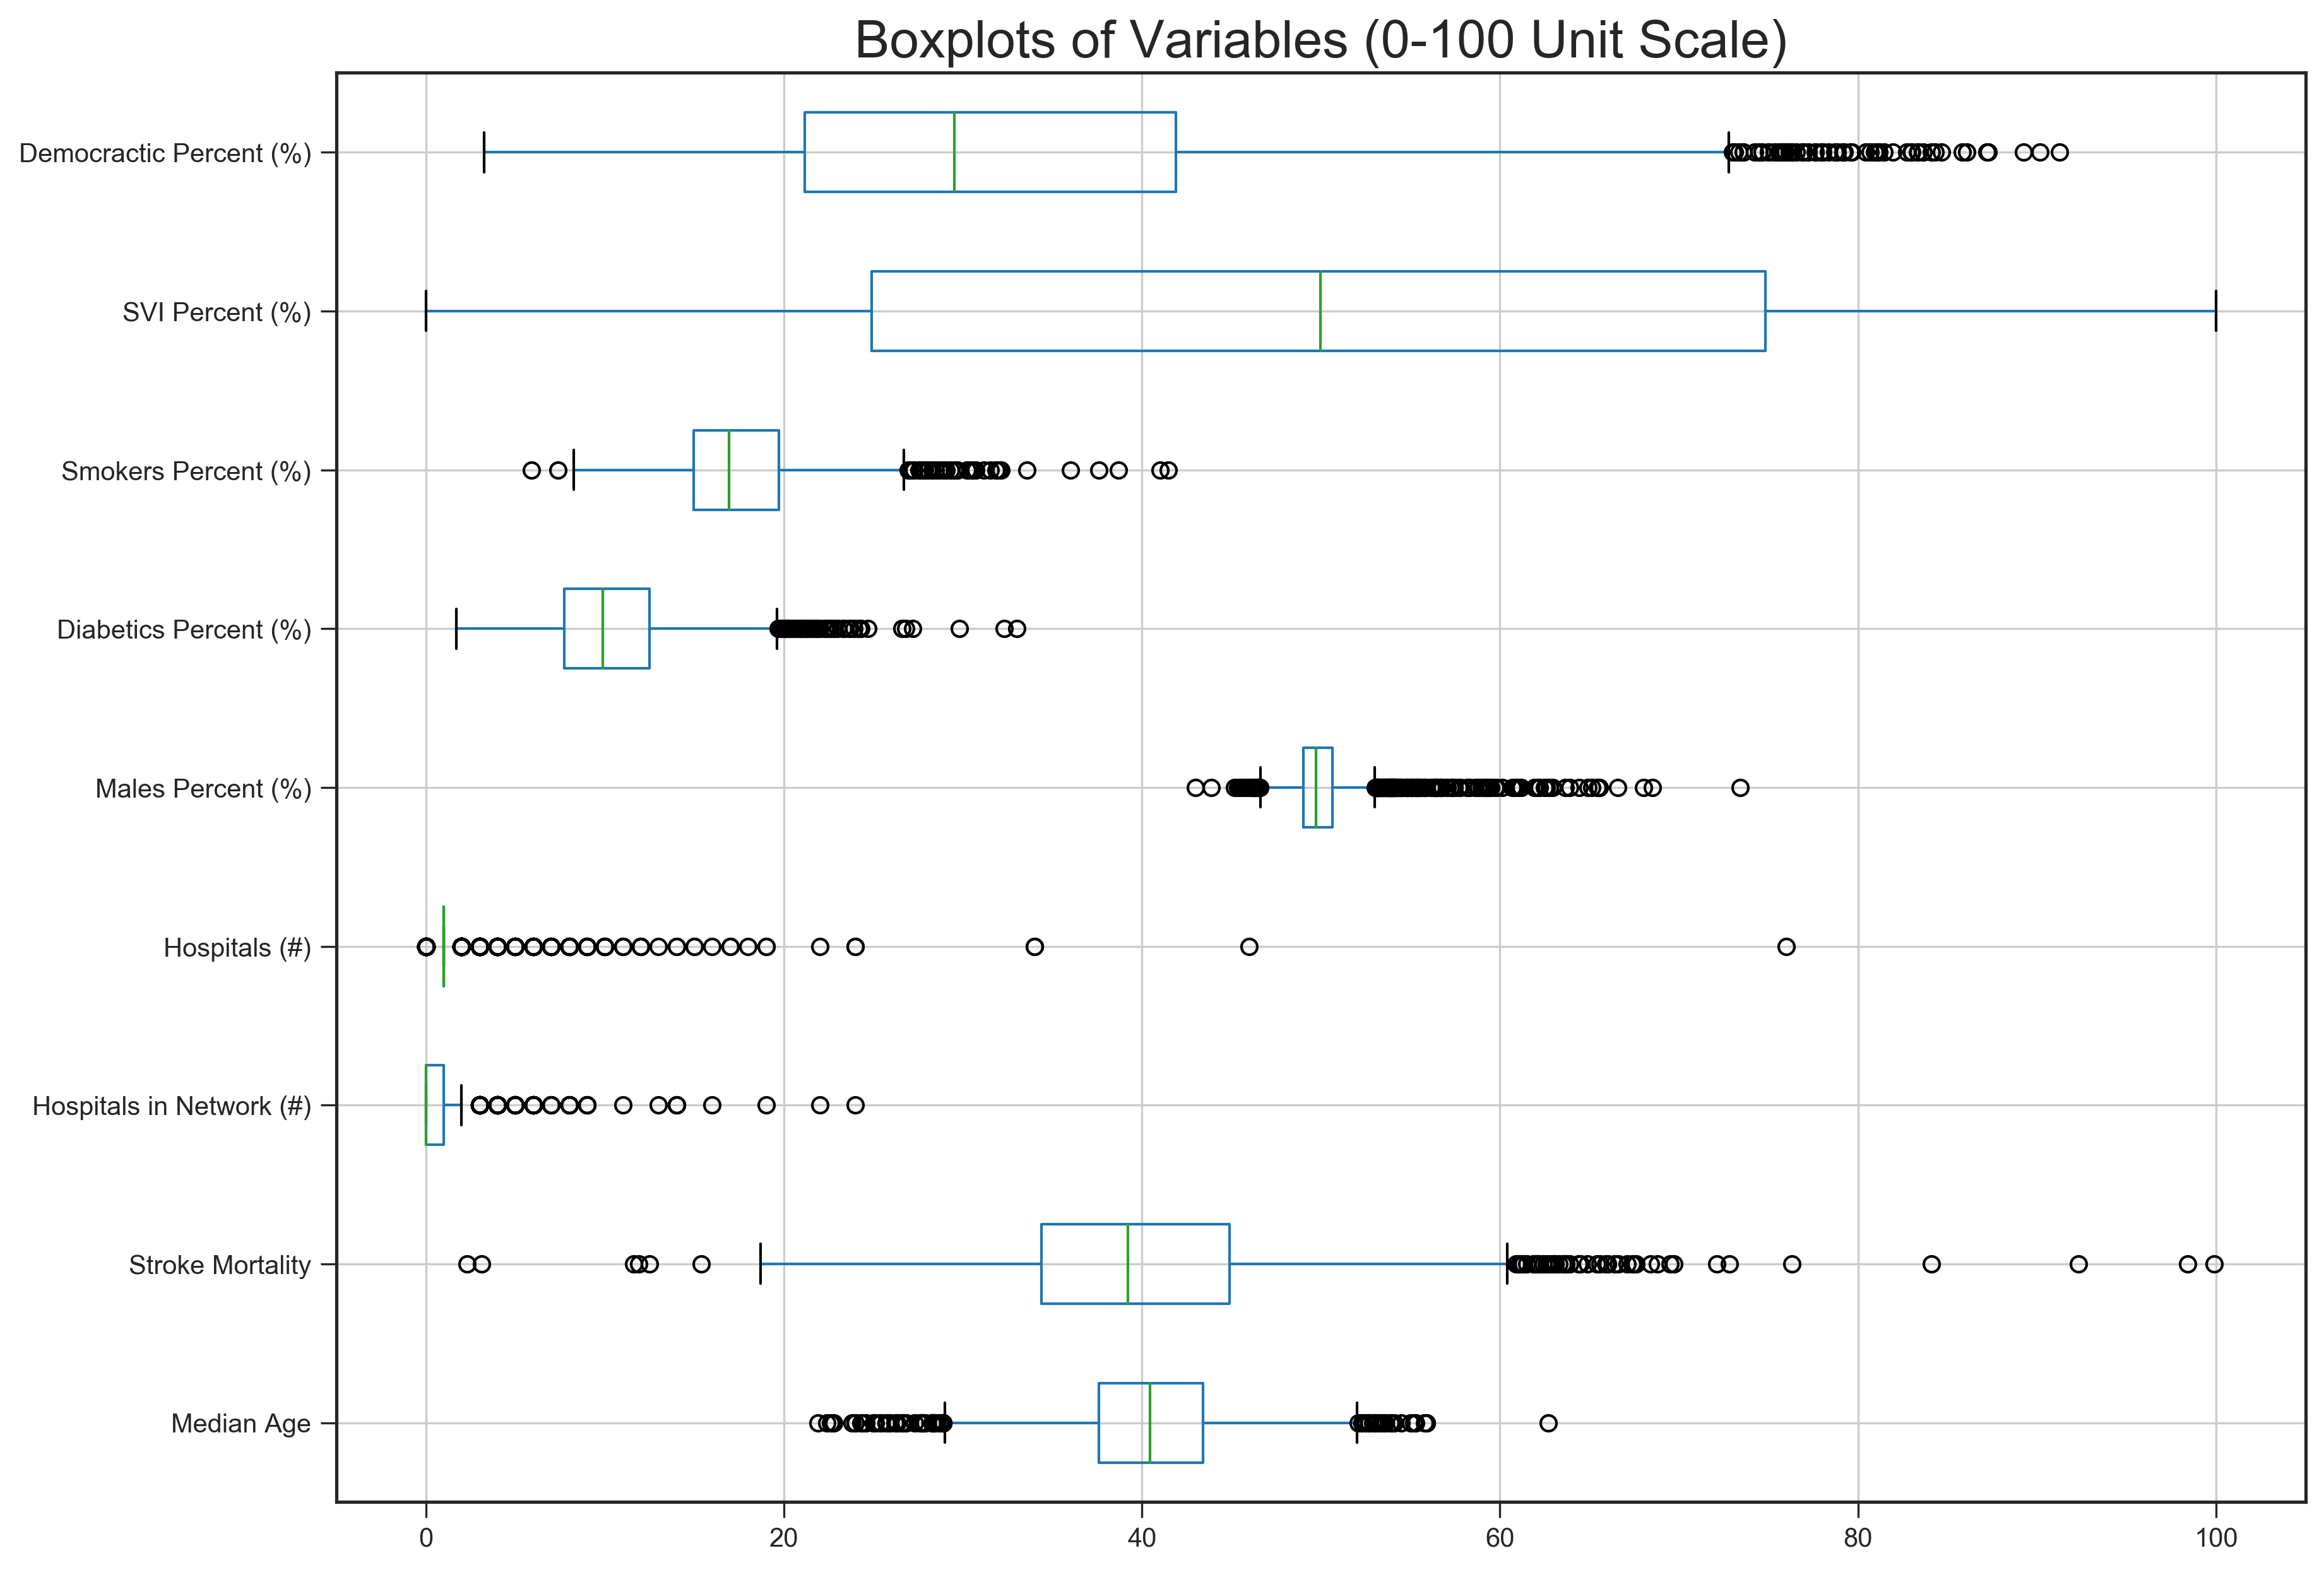

In [7]:
box_d=station_d.copy()

box_d=box_d[["PopulationEstimate2018","FracMale2017",'PopulationDensityperSqMile2010','MedianAge2010',
               '#EligibleforMedicare2018','DiabetesPercentage',
               'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
               'RespMortalityRate2014', '#FTEHospitalTotal2017',
               "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
               '#Hospitals', '#ICU_beds', 'dem_prop','SVIPercentile']]

box_d["FracMale2017"]=box_d["FracMale2017"]*100
box_d["SVIPercentile"]=box_d["SVIPercentile"]*100

scale_100=['MedianAge2010','StrokeMortality','#HospParticipatinginNetwork2017','#Hospitals',"FracMale2017",'DiabetesPercentage',
           'Smokers_Percentage', 'SVIPercentile',"dem_prop"]
box_d=box_d[scale_100]
box_d.columns=['Median Age','Stroke Mortality', 'Hospitals in Network (#)', 'Hospitals (#)', 'Males Percent (%)',
        'Diabetics Percent (%)', 'Smokers Percent (%)',
       'SVI Percent (%)', 'Democractic Percent (%)']
plt.figure(figsize=(16,10),dpi=300)
plt.style.use("seaborn-ticks")
box_d.boxplot(vert=False)
plt.title("Boxplots of Variables (0-100 Unit Scale)",fontsize=20)
plt.subplots_adjust(left=0.25)
plt.show()

C:\Users\sh777\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


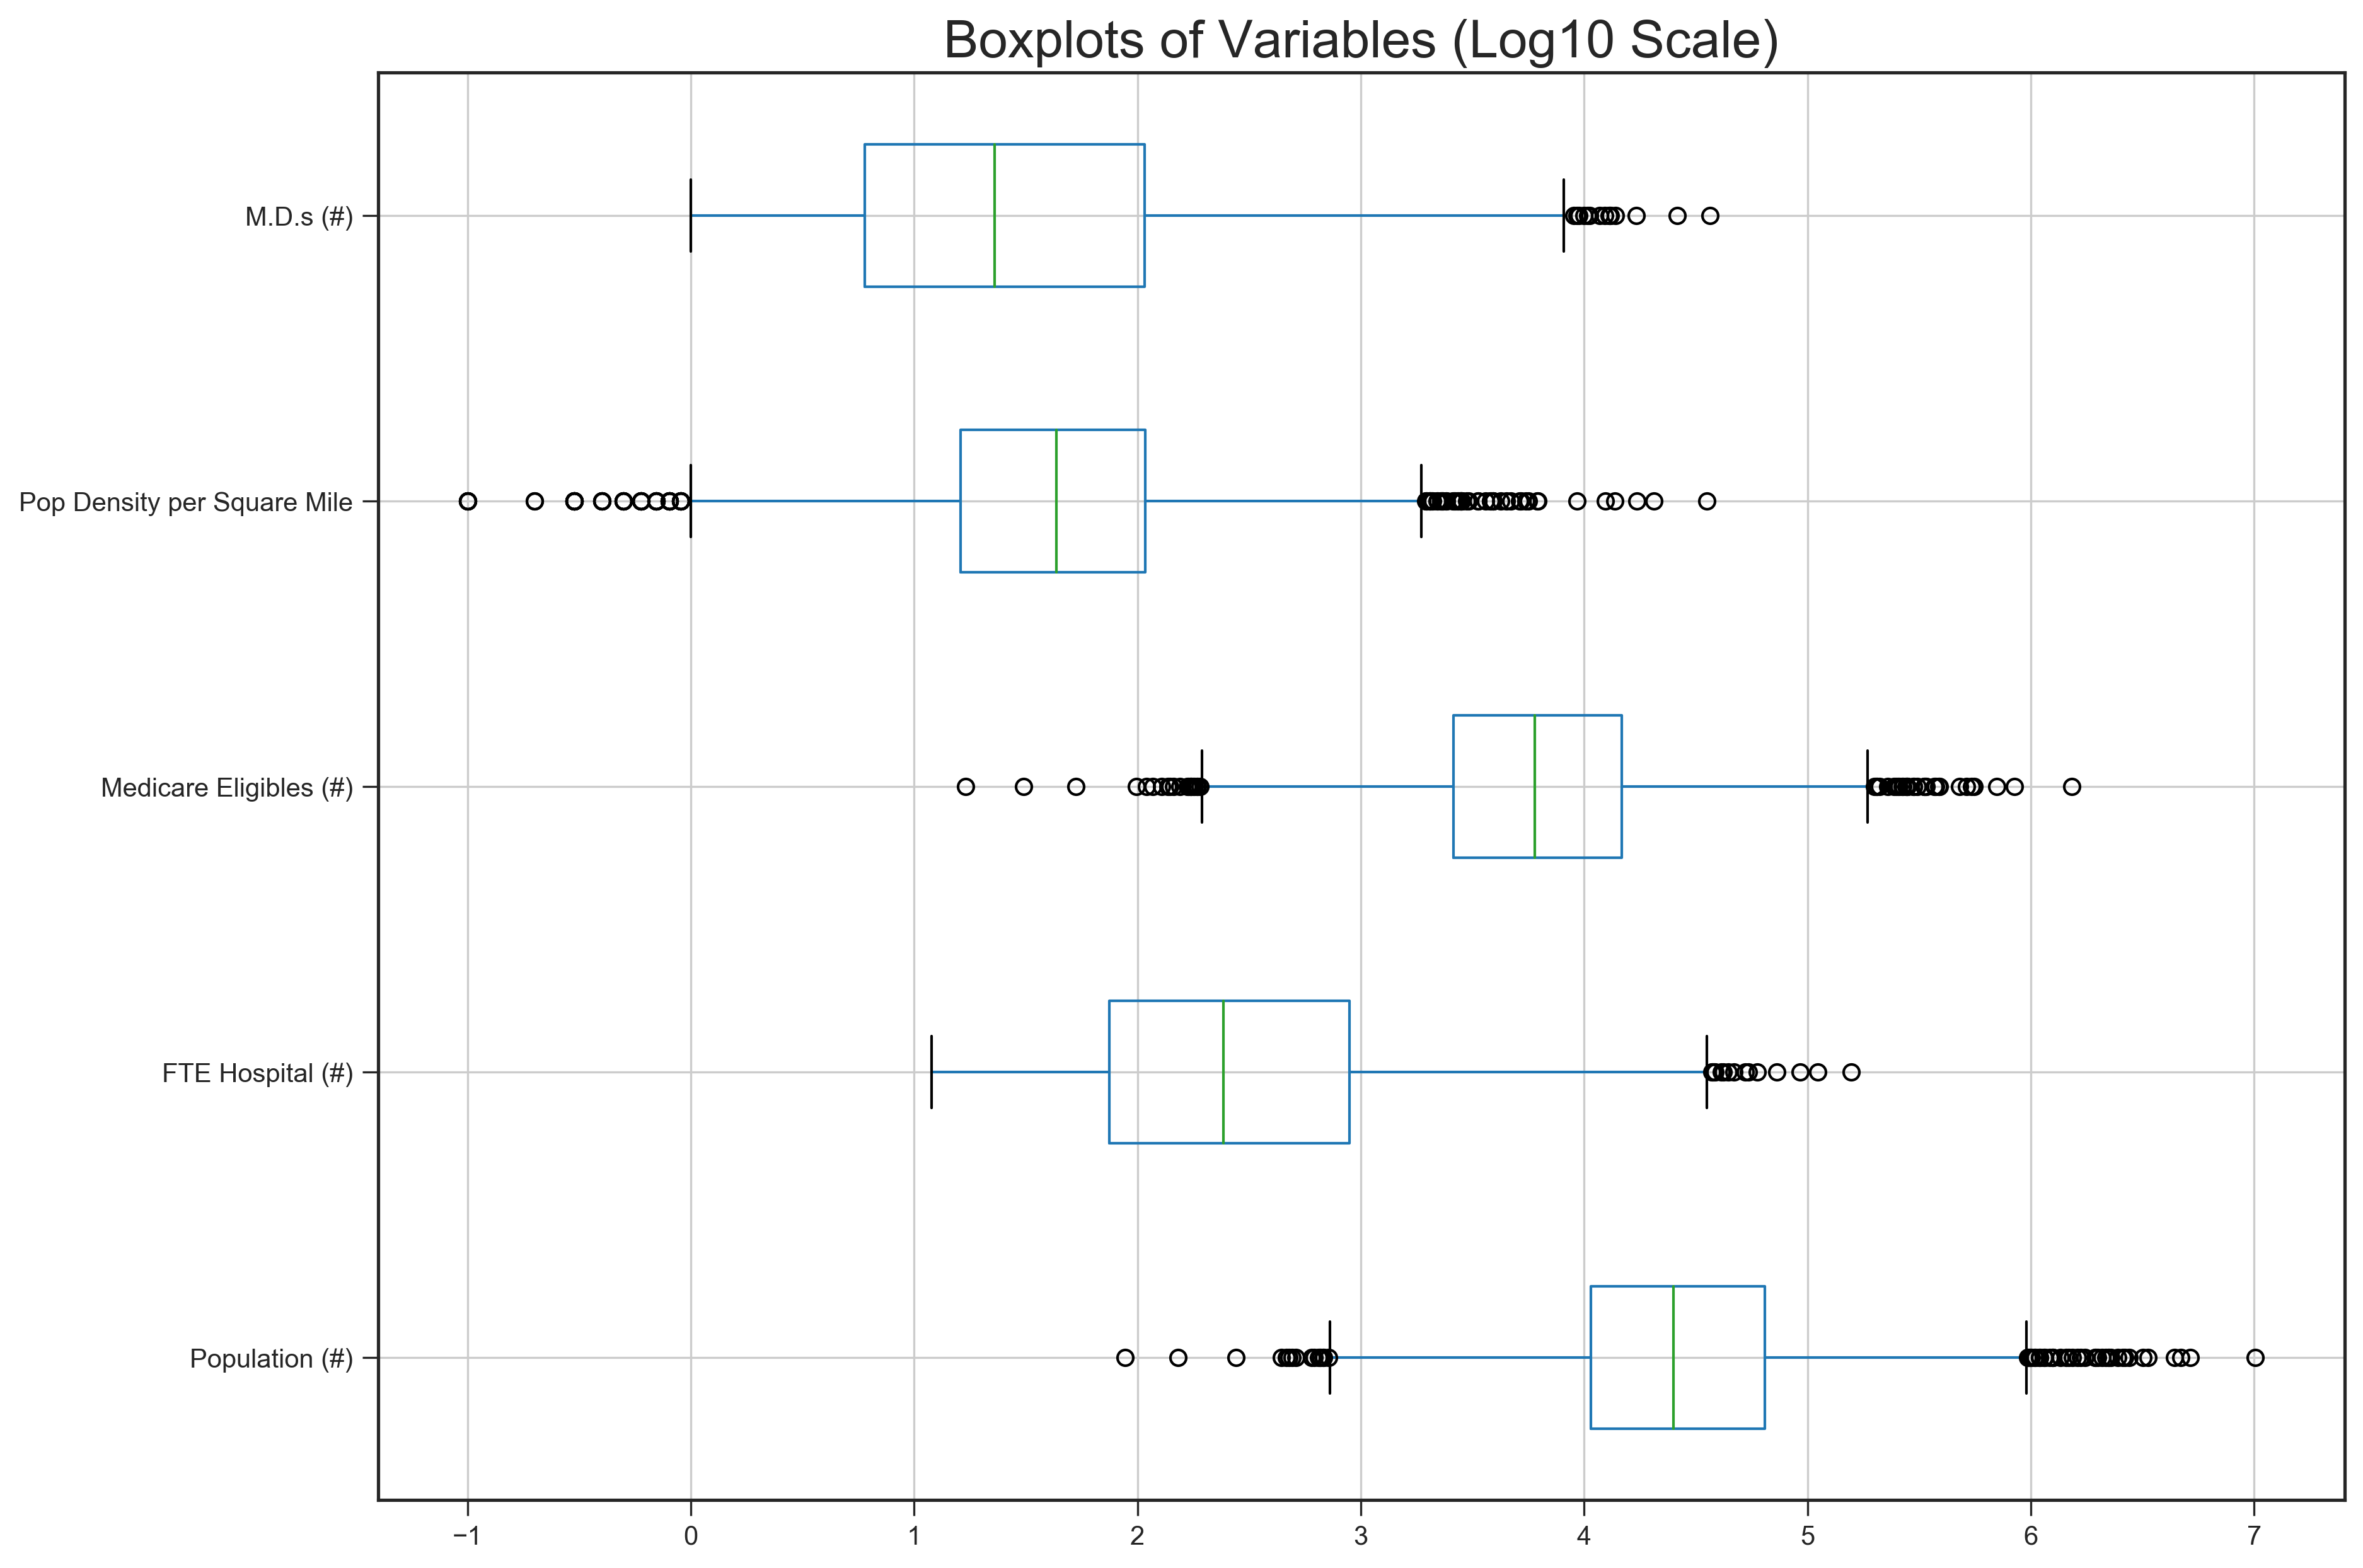

In [8]:
scale_log=["PopulationEstimate2018", '#FTEHospitalTotal2017','#EligibleforMedicare2018',
           "PopulationDensityperSqMile2010","TotalM.D.'s,TotNon-FedandFed2017"]
box_d=np.log10(station_d[scale_log])
box_d.columns=["Population (#)", 'FTE Hospital (#)','Medicare Eligibles (#)',
               "Pop Density per Square Mile","M.D.s (#)"]
plt.figure(figsize=(16,10),dpi=300)
plt.style.use("seaborn-ticks")

box_d.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title("Boxplots of Variables (Log10 Scale)",fontsize=20)
plt.show()

In [6]:
for c in ["PopulationEstimate2018","FracMale2017",'PopulationDensityperSqMile2010','MedianAge2010',
               '#EligibleforMedicare2018','DiabetesPercentage',
               'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
               'RespMortalityRate2014', '#FTEHospitalTotal2017',
               "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
               '#Hospitals', '#ICU_beds', 'dem_prop','SVIPercentile']:
    if not(c in scale_log) and not(c in scale_100):
        print(c,min(station_d[c]),max(station_d[c]))

HeartDiseaseMortality 57.6 603.0
RespMortalityRate2014 14.27 160.97
#ICU_beds 0.0 2126.0


C:\Users\sh777\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
C:\Users\sh777\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1237: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


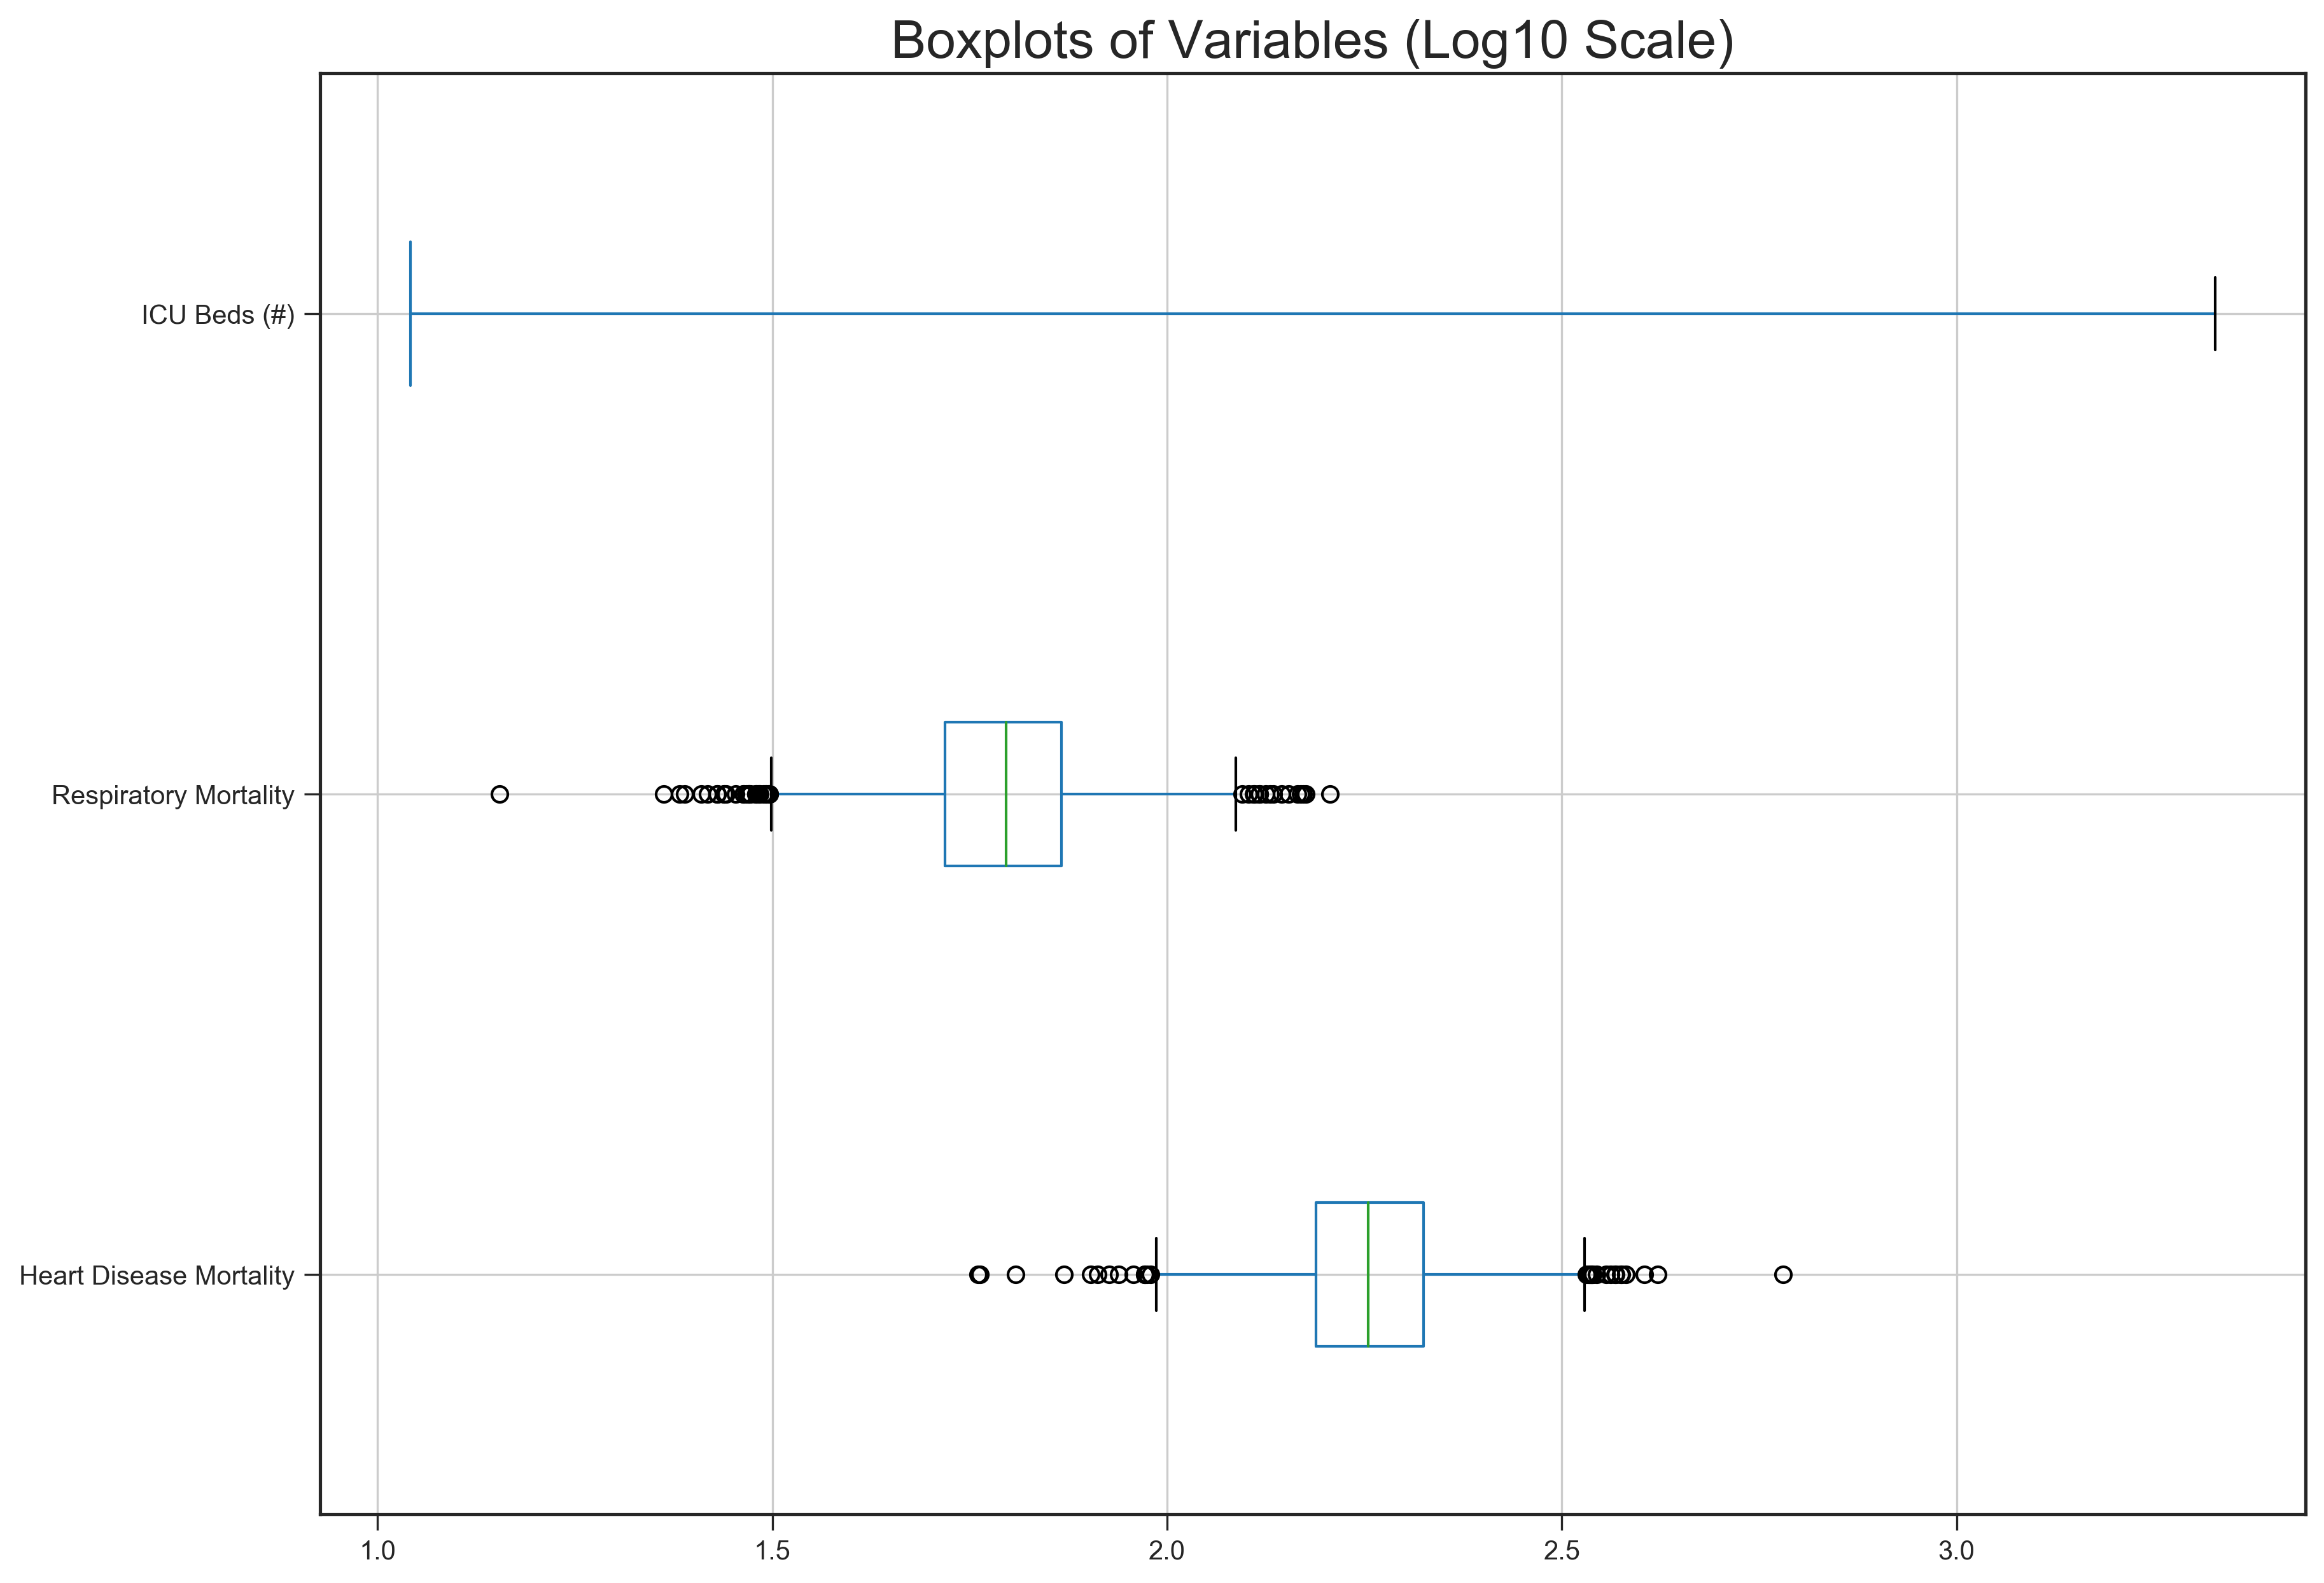

In [9]:
scale_shibal=["HeartDiseaseMortality","RespMortalityRate2014","#ICU_beds"]
plt.figure(figsize=(16,10),dpi=300)
plt.style.use("seaborn-ticks")
box_d=np.log10(station_d[scale_shibal])
box_d.columns=["Heart Disease Mortality","Respiratory Mortality","ICU Beds (#)"]

box_d.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title("Boxplots of Variables (Log10 Scale)",fontsize=20)
plt.show()

In [15]:
station_d=station_d[station_d.countyFIPS!=46113]

Text(0.5, 1, 'Heatmap of Missingness')

<Figure size 4800x3000 with 0 Axes>

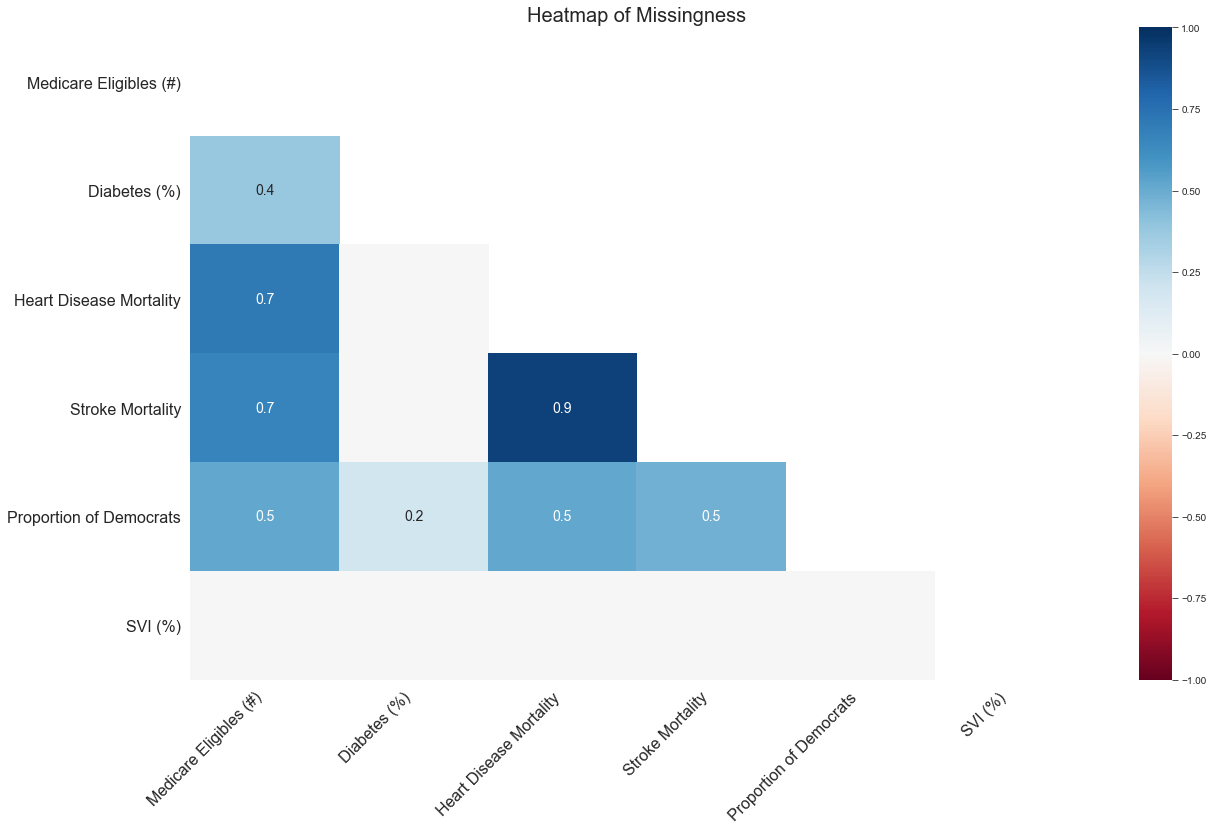

In [42]:
heat_d=station_d.copy()

heat_d=heat_d[["PopulationEstimate2018","FracMale2017",'PopulationDensityperSqMile2010','MedianAge2010',
               '#EligibleforMedicare2018','DiabetesPercentage',
               'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
               'RespMortalityRate2014', '#FTEHospitalTotal2017',
               "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
               '#Hospitals', '#ICU_beds', 'dem_prop','SVIPercentile']]
heat_d.columns=['Population', 'Male Pop. Proportion',
       'Pop. Density per Mile Sq', 'Median Age',
       'Medicare Eligibles (#)', 'Diabetes (%)',
       'Heart Disease Mortality', 'Stroke Mortality', 'Smokers (%)',
       'Respitory Mortality Rate', 'FTE Hospital (#)',
       'M.D. (#)', 'Hospital in Network',
       'Hospitals (#)', 'ICU_beds (#)', 'Proportion of Democrats', 'SVI (%)']
plt.figure(figsize=(16,10),dpi=300)
plt.style.use("seaborn-ticks")
missingno.heatmap(heat_d)
plt.title("Heatmap of Missingness",fontsize=20)

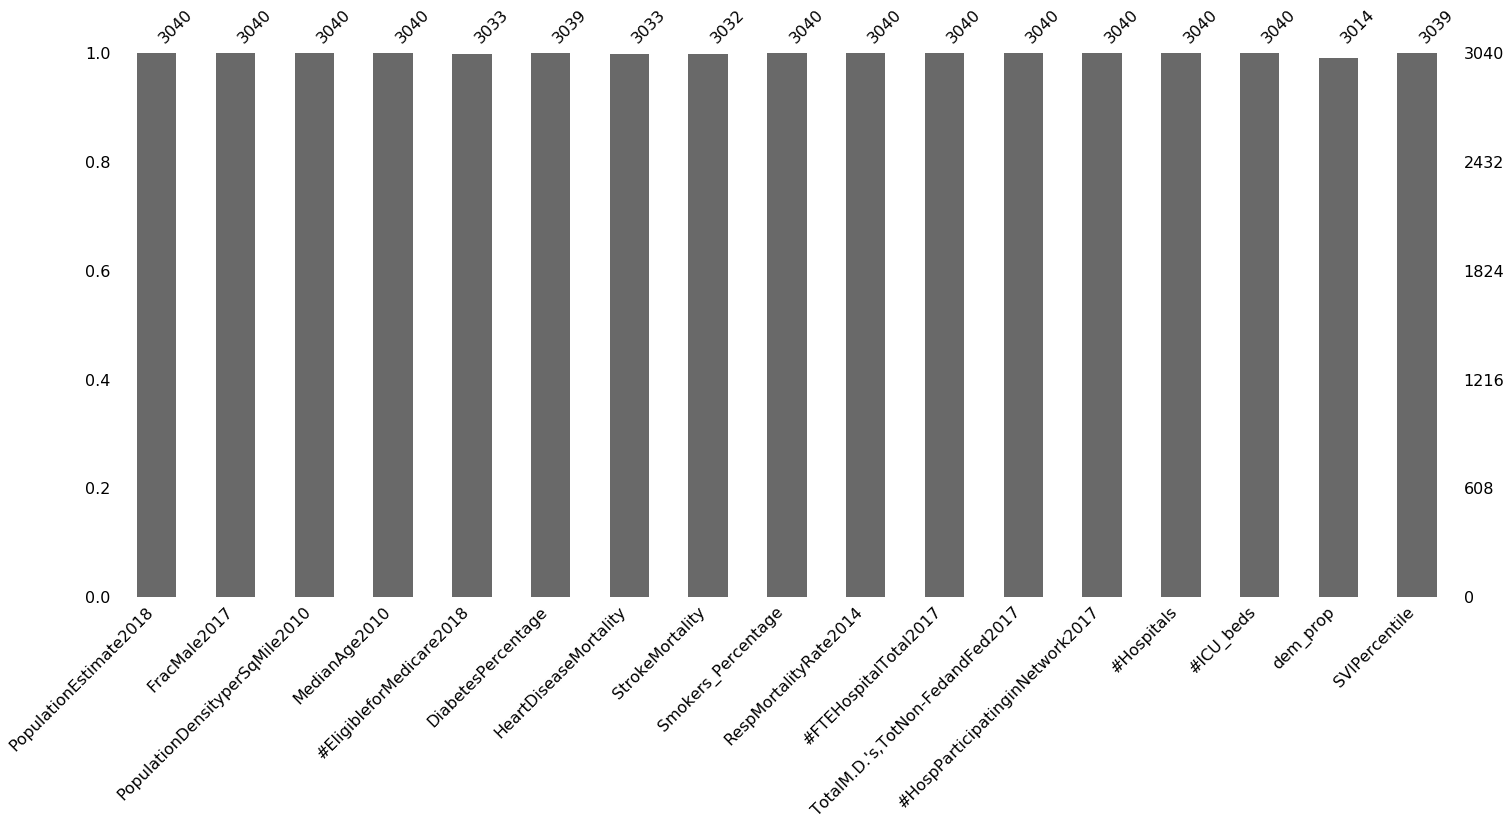

In [17]:
missingno.bar(heat_d)

## Range & Type

In [18]:
cat_temp=[]
cat_temp2=[]
cat=['countyFIPS','StateName','CensusRegionName', 'CensusDivisionName','Rural-UrbanContinuumCode2013']
cont=[i for i in station_d.columns if not(i in cat) and (i != "index")]
for c in cat:
    cat_temp.append(len(list(Counter(station_d[c]).keys())))
    cat_temp2.append(sum(station_d[c].isnull()))

cat_d=pd.DataFrame([cat_temp,cat_temp2]).transpose()
cat_d.columns=["Number of Categories","Missing"]
cat_d.index=cat

min_temp=[]
median_temp=[]
mean_temp=[]
max_temp=[]
missing_temp=[]
for c in cont:
    min_temp.append(min(station_d[c]))
    median_temp.append(np.nanmedian(station_d[c]))
    mean_temp.append(np.nanmean(station_d[c]))
    max_temp.append(max(station_d[c]))
    missing_temp.append(sum(station_d[c].isnull()))
range_d=round(pd.DataFrame([min_temp,median_temp,mean_temp,max_temp,missing_temp]).transpose(),2)
range_d.columns=["Minimum","Median","Mean","Maximum","Missing"]
range_d.index=cont
range_d["Missing"]=range_d["Missing"].astype(int)
range_d

,Minimum,Median,Mean,Maximum,Missing
POP_LATITUDE,19.67,38.38,38.49,70.52,0
POP_LONGITUDE,-168.29,-90.57,-92.46,-67.46,0
PopulationEstimate2018,88.00,25072.00,98159.12,10105518.00,0
PopTotalMale2017,42.00,12545.50,48185.36,5009834.00,0
PopTotalFemale2017,46.00,12517.50,49532.04,5153673.00,0
FracMale2017,0.43,0.50,0.50,0.73,0
PopulationEstimate65+2017,12.00,4632.50,15329.50,1343960.00,0
PopulationDensityperSqMile2010,0.00,43.45,206.95,35369.20,0
MedianAge2010,21.90,40.45,40.42,62.70,0
#EligibleforMedicare2018,17.00,6001.00,18846.92,1530126.00,7


In [19]:
range_d.loc[['POP_LATITUDE', 'POP_LONGITUDE', 'PopulationEstimate2018',
             'FracMale2017','PopulationDensityperSqMile2010',
             'MedianAge2010', '#EligibleforMedicare2018',
             'MedicareEnrollment,AgedTot2017', 'DiabetesPercentage',
             'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
             'RespMortalityRate2014', '#FTEHospitalTotal2017',
             "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
             '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio','SVIPercentile']]

,Minimum,Median,Mean,Maximum,Missing
POP_LATITUDE,19.67,38.38,38.49,70.52,0
POP_LONGITUDE,-168.29,-90.57,-92.46,-67.46,0
PopulationEstimate2018,88.00,25072.00,98159.12,10105518.00,0
FracMale2017,0.43,0.50,0.50,0.73,0
PopulationDensityperSqMile2010,0.00,43.45,206.95,35369.20,0
MedianAge2010,21.90,40.45,40.42,62.70,0
#EligibleforMedicare2018,17.00,6001.00,18846.92,1530126.00,7
"MedicareEnrollment,AgedTot2017",0.00,4537.00,14785.35,1276832.00,21
DiabetesPercentage,1.70,9.90,10.37,33.00,1
HeartDiseaseMortality,57.60,179.70,186.13,603.00,7


In [20]:
cat_d

,Number of Categories,Missing
countyFIPS,3040,0
StateName,50,0
CensusRegionName,4,0
CensusDivisionName,9,0
Rural-UrbanContinuumCode2013,9,0


In [21]:
min_temp=[]
median_temp=[]
mean_temp=[]
max_temp=[]
missing_temp=[]
for c in cont:
    min_temp.append(min(station_d[c]))
    median_temp.append(np.nanmedian(station_d[c]))
    mean_temp.append(np.nanmean(station_d[c]))
    max_temp.append(max(station_d[c]))
    missing_temp.append(sum(station_d[c].isnull()))
range_d=round(pd.DataFrame([min_temp,median_temp,mean_temp,max_temp,missing_temp]).transpose(),2)
range_d.columns=["Minimum","Median","Mean","Maximum","Missing"]
range_d.index=cont
range_d

,Minimum,Median,Mean,Maximum,Missing
POP_LATITUDE,19.67,38.38,38.49,70.52,0.0
POP_LONGITUDE,-168.29,-90.57,-92.46,-67.46,0.0
PopulationEstimate2018,88.00,25072.00,98159.12,10105518.00,0.0
PopTotalMale2017,42.00,12545.50,48185.36,5009834.00,0.0
PopTotalFemale2017,46.00,12517.50,49532.04,5153673.00,0.0
FracMale2017,0.43,0.50,0.50,0.73,0.0
PopulationEstimate65+2017,12.00,4632.50,15329.50,1343960.00,0.0
PopulationDensityperSqMile2010,0.00,43.45,206.95,35369.20,0.0
MedianAge2010,21.90,40.45,40.42,62.70,0.0
#EligibleforMedicare2018,17.00,6001.00,18846.92,1530126.00,7.0


## Missing Values

In [22]:
missing=[j for i,j in enumerate(station_d.isnull().sum(axis=1))]
missing_d=pd.DataFrame(data=missing,index=station_d.countyFIPS)
missing_d.columns=["Number of Missing Values"]
print("*Counties with at least 3 variables missing")
missing_d.sort_values(by="Number of Missing Values")
missing_d[missing_d["Number of Missing Values"] > 2]

*Counties with at least 3 variables missing


,Number of Missing Values
countyFIPS,
2060,4
2270,4
2282,4
2105,5
2195,5
2198,5
2230,5
2275,5
15005,3


In [23]:
# Dropping county 46113
station_d=station_d[station_d.countyFIPS!=46113]

## Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

temp_df = add_constant(temp_df)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(temp_df.values, i) for i in range(temp_df.shape[1])]
vif["features"] = temp_df.columns
vif

NameError: name 'temp_df' is not defined

In [ ]:
df_cor = heat_d.corr()
vif_d=pd.DataFrame(np.linalg.inv(heat_d.corr().values), index = df_cor.index, columns=df_cor.columns)
vif_d=pd.DataFrame(pd.Series(np.diag(vif_d), index=[vif_d.index]))
vif_d.columns=["VIF"]
vif_d["Greater than 10?"]=vif_d.VIF>10
vif_d.sort_values(by=['VIF'])

In [ ]:
vif_d

In [ ]:
df = station_d[['POP_LATITUDE', 'POP_LONGITUDE','Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
                     'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
                     'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
                     'CensusPopulation2010', 'MedianAge2010', '#EligibleforMedicare2018',
                     'MedicareEnrollment,AgedTot2017', 'DiabetesPercentage',
                     'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
                       'RespMortalityRate2014', '#FTEHospitalTotal2017',
                       "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
                       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
                       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
                       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
                       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
                       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
                       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
                       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
                       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
                       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
                       'PopMale>842010', 'PopFmle>842010', 'SVIPercentile']].dropna()